In [195]:
import pandas as pd  # For handling  and analyzing structured data (DataFrames, CSVs, etc.)
import numpy as np   # for numerical computations and array operations
import matplotlib. pyplot as plt  # for data visualization
import seaborn as sns   # for advanced and attractive statistical plots
from scipy import stats # for statistical tests and correlation analysis
import warnings         # To manage warning messages 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder # Convert categorical (text) into a numeric code so that it can appear in correlation matrix
import re # Python's built-in regular expressions module for pattern matching, searching, and string manipulation (e.g., cleaning column names or extracting text patterns).

In [196]:
# Load the Dataset
df = pd.read_csv('Music and Mental Health Result .csv')

In [197]:
# Display first 5 rows
print(df.head())

            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  

In [198]:
# Number of Rows and Columns
print(f"Dataset shape: {df.shape}")  

Dataset shape: (736, 33)


In [199]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [200]:
# Summary statistics

print(df.describe(include='all')) 

                 Timestamp         Age Primary streaming service  \
count                  736  735.000000                       735   
unique                 735         NaN                         6   
top     8/28/2022 16:15:08         NaN                   Spotify   
freq                     2         NaN                       458   
mean                   NaN   25.206803                       NaN   
std                    NaN   12.054970                       NaN   
min                    NaN   10.000000                       NaN   
25%                    NaN   18.000000                       NaN   
50%                    NaN   21.000000                       NaN   
75%                    NaN   28.000000                       NaN   
max                    NaN   89.000000                       NaN   

        Hours per day While working Instrumentalist Composer Fav genre  \
count      736.000000           733             732      735       736   
unique            NaN             2

In [201]:
#Rename Columns
column_names = { 'Primary streaming service':'PrimaryStreamingService', 'Hours per day':'HoursPerDay' , 'While working' : 'WhileWorking' , 'Fav genre' : 'FavGenre' ,'Foreign languages' : 'ForeignLanguages', 'Music effects':'MusicEffects','Frequency [K pop]':'Frequency [Kpop]','Frequency [Hip hop]':'Frequency [Hiphop]','Frequency [Video game music]':'Frequency [VideoGameMusic]'}

df = df.rename(columns=column_names)   

def clean_column_name(col):
    # Use regex to extract inside [ ] and strip extras
    match = re.search(r'\[(.*?)\]', col)
    if match:
        return match.group(1).strip()
    return col  # Fallback

# Apply to all columns that match the pattern
df.columns = [clean_column_name(col) if 'Frequency [' in col else col for col in df.columns]

# Verify the changes (optional)
print(df.columns.tolist())  # Should now show ['Classical', 'Country', 'EDM', ...]


['Timestamp', 'Age', 'PrimaryStreamingService', 'HoursPerDay', 'WhileWorking', 'Instrumentalist', 'Composer', 'FavGenre', 'Exploratory', 'ForeignLanguages', 'BPM', 'Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hiphop', 'Jazz', 'Kpop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'VideoGameMusic', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'MusicEffects', 'Permissions']


In [202]:
print("\nColumns AFTER renaming (full list):")
print(df.columns.tolist())
print("\nSample after (first 5):", df.columns[:5].tolist())


Columns AFTER renaming (full list):
['Timestamp', 'Age', 'PrimaryStreamingService', 'HoursPerDay', 'WhileWorking', 'Instrumentalist', 'Composer', 'FavGenre', 'Exploratory', 'ForeignLanguages', 'BPM', 'Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hiphop', 'Jazz', 'Kpop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'VideoGameMusic', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'MusicEffects', 'Permissions']

Sample after (first 5): ['Timestamp', 'Age', 'PrimaryStreamingService', 'HoursPerDay', 'WhileWorking']


In [203]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                736 non-null    object 
 1   Age                      735 non-null    float64
 2   PrimaryStreamingService  735 non-null    object 
 3   HoursPerDay              736 non-null    float64
 4   WhileWorking             733 non-null    object 
 5   Instrumentalist          732 non-null    object 
 6   Composer                 735 non-null    object 
 7   FavGenre                 736 non-null    object 
 8   Exploratory              736 non-null    object 
 9   ForeignLanguages         732 non-null    object 
 10  BPM                      629 non-null    float64
 11  Classical                736 non-null    object 
 12  Country                  736 non-null    object 
 13  EDM                      736 non-null    object 
 14  Folk                     7

In [204]:
# Make Two Columns Date, Time
# Parse Timestamp to datetime (handles US date + 24-hour time format)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M:%S', errors='coerce')

In [205]:
# Extract the Date and Time to Two Columns
df['Date'] = df['Timestamp'].dt.date # Date as date object
df['Time'] = df['Timestamp'].dt.time # Time as time object

In [206]:
print(df[['Timestamp', 'Date', 'Time']].head())

            Timestamp        Date      Time
0 2022-08-27 19:29:02  2022-08-27  19:29:02
1 2022-08-27 19:57:31  2022-08-27  19:57:31
2 2022-08-27 21:28:18  2022-08-27  21:28:18
3 2022-08-27 21:40:40  2022-08-27  21:40:40
4 2022-08-27 21:54:47  2022-08-27  21:54:47


In [207]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                736 non-null    datetime64[ns]
 1   Age                      735 non-null    float64       
 2   PrimaryStreamingService  735 non-null    object        
 3   HoursPerDay              736 non-null    float64       
 4   WhileWorking             733 non-null    object        
 5   Instrumentalist          732 non-null    object        
 6   Composer                 735 non-null    object        
 7   FavGenre                 736 non-null    object        
 8   Exploratory              736 non-null    object        
 9   ForeignLanguages         732 non-null    object        
 10  BPM                      629 non-null    float64       
 11  Classical                736 non-null    object        
 12  Country                  736 non-nul

In [208]:
# Remove Timestamp Column and Time columns
df.drop(columns=['Timestamp','Time','Permissions'], inplace=True)

In [209]:
Key_cols = ['MusicEffects', 'Age', 'PrimaryStreamingService', 'WhileWorking','Instrumentalist', 'Composer', 'ForeignLanguages']
# Check nulls  (confirm <10 per column)
print("Null values per key column (before):")
print(df[Key_cols].isnull().sum())

Null values per key column (before):
MusicEffects               8
Age                        1
PrimaryStreamingService    1
WhileWorking               3
Instrumentalist            4
Composer                   1
ForeignLanguages           4
dtype: int64


In [210]:
# Drop Null Values Rows (which have less than 10 null values )
df = df.dropna(subset = Key_cols)

In [211]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 2 to 735
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      718 non-null    float64
 1   PrimaryStreamingService  718 non-null    object 
 2   HoursPerDay              718 non-null    float64
 3   WhileWorking             718 non-null    object 
 4   Instrumentalist          718 non-null    object 
 5   Composer                 718 non-null    object 
 6   FavGenre                 718 non-null    object 
 7   Exploratory              718 non-null    object 
 8   ForeignLanguages         718 non-null    object 
 9   BPM                      616 non-null    float64
 10  Classical                718 non-null    object 
 11  Country                  718 non-null    object 
 12  EDM                      718 non-null    object 
 13  Folk                     718 non-null    object 
 14  Gospel                   718 no

In [212]:
# Check BPM values higher than 400 filtering (confirm any >400). Find Outliers 

print("Before filtering:")
print(f"Total rows: {len(df)}")
print(f"Rows with BPM > 500: {len(df[df['BPM'] > 500])}")
print(f"Rows with BPM NaN: {df['BPM'].isnull().sum()}")
print(f"BPM outliers (if any):")
outliers = df[df['BPM'] > 500][['BPM', 'FavGenre']]  # Or use >400 if preferred
print(outliers)

#  Filter to drop ONLY outliers 
df = df[(df['BPM'] <= 500) | df['BPM'].isnull()].reset_index(drop=True)



Before filtering:
Total rows: 718
Rows with BPM > 500: 2
Rows with BPM NaN: 102
BPM outliers (if any):
             BPM          FavGenre
568  999999999.0  Video game music
644        624.0               EDM


In [237]:
# Remove Outliers form BPM 
# Overwrites df; reset_index for clean numbering
df = df[(df['BPM'] <= 500) | df['BPM'].isnull()].reset_index(drop=True)
print(f"\nAfter filtering (removing)")
print(f"Total rows: {len(df)}")  # 718 - 2 = 716




After filtering (removing)
Total rows: 716


In [214]:
# Replace the Missing Values of BPM with Median (Median Imputation ) of Each Genre
print(f"BPM nulls: {df['BPM'].isnull().sum()}")
print(f"Shape: {df.shape}")
print(f"Index range: {df.index.min()} to {df.index.max()}")

BPM nulls: 102
Shape: (716, 32)
Index range: 0 to 715


In [215]:
# Compute medians of BPM per favorite genre
genre_medians = df.groupby('FavGenre')['BPM'].median().to_dict()
overall_median = df['BPM'].median()  # Fallback if genre missing

In [216]:
# Function to impute each row (fill missing values of BPM)
def impute_bpm(row):
    if pd.isnull(row['BPM']):
        return genre_medians.get(row['FavGenre'], overall_median)
    return row['BPM']

# Apply and assign back to df['BPM'], Runs the function on every row, producing a new Series of imputed BPMs. Assigns it back to df['BPM'], overwriting the column.
df['BPM'] = df.apply(impute_bpm, axis=1)

In [217]:
 # Reset index for clean rows (0-based)
df = df.reset_index(drop=True)

In [218]:
#  Verify
print("\nAfter imputation:")
print(f"BPM nulls: {df['BPM'].isnull().sum()}")  # Should be 0
print(f"Shape: {df.shape}")
print(df.info())  # Run this to see 718 non-null for BPM


After imputation:
BPM nulls: 0
Shape: (716, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      716 non-null    float64
 1   PrimaryStreamingService  716 non-null    object 
 2   HoursPerDay              716 non-null    float64
 3   WhileWorking             716 non-null    object 
 4   Instrumentalist          716 non-null    object 
 5   Composer                 716 non-null    object 
 6   FavGenre                 716 non-null    object 
 7   Exploratory              716 non-null    object 
 8   ForeignLanguages         716 non-null    object 
 9   BPM                      716 non-null    float64
 10  Classical                716 non-null    object 
 11  Country                  716 non-null    object 
 12  EDM                      716 non-null    object 
 13  Folk                     716 no

In [219]:
print (f"Dataset Shape: {df.shape}")
print(df.info())
print("\nNumeric Summery :")
print(df.describe())  # Means ( Average) , std for Age, BPM, MH scores
print("\nCategorical summary:")
print(df.select_dtypes(include='object').describe(include='all'))  # Counts, uniques for genres, services

Dataset Shape: (716, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      716 non-null    float64
 1   PrimaryStreamingService  716 non-null    object 
 2   HoursPerDay              716 non-null    float64
 3   WhileWorking             716 non-null    object 
 4   Instrumentalist          716 non-null    object 
 5   Composer                 716 non-null    object 
 6   FavGenre                 716 non-null    object 
 7   Exploratory              716 non-null    object 
 8   ForeignLanguages         716 non-null    object 
 9   BPM                      716 non-null    float64
 10  Classical                716 non-null    object 
 11  Country                  716 non-null    object 
 12  EDM                      716 non-null    object 
 13  Folk                     716 non-null    object 
 14  G

In [220]:

df.to_csv('cleaned_dataset.csv', index=False)


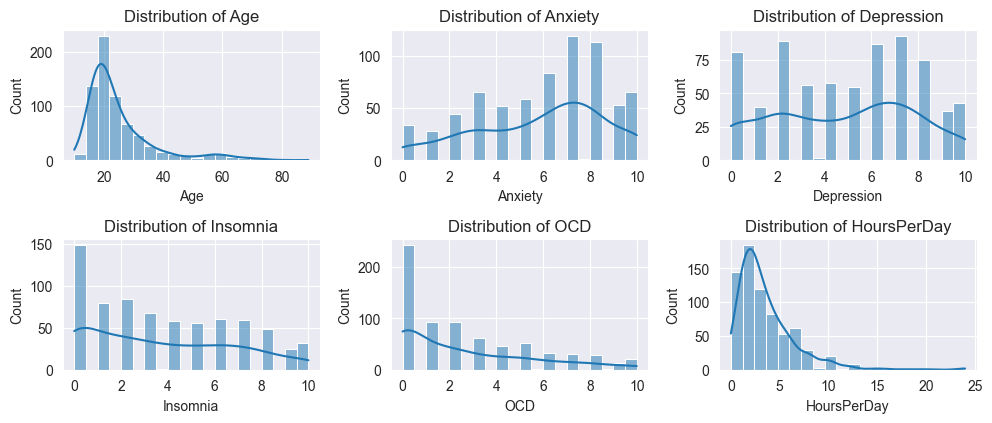

In [241]:
# Distribution of the Key Parameters 
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

key_parameters = ['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD','HoursPerDay']
for i, col in enumerate(key_parameters, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [221]:
# Group the Participant by Age

def categorize_age(Age):
    if pd.isna(Age):
        return 'Unknown'
    elif 10 <= Age <= 20:
        return '10-20'
    elif 21 <= Age <= 30:
        return '21-30'
    elif 31 <= Age <= 40:
        return '31-40'
    elif 41 <= Age <= 50:
        return '41-50'
    elif 51 <= Age <= 60:
        return '51-60'
    else:
        return '60+'
df['Age_Group'] = df['Age'].apply(categorize_age)

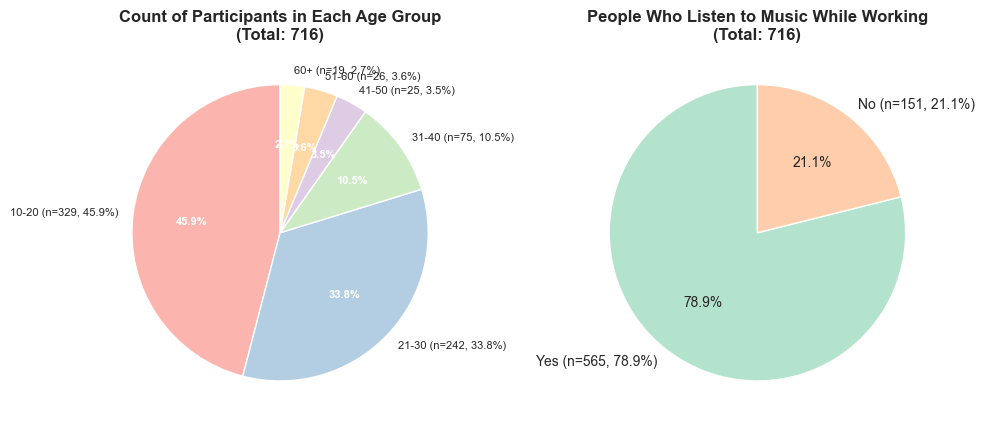

Age Group Summary:
Age_Group
10-20    329
21-30    242
31-40     75
41-50     25
51-60     26
60+       19
Name: count, dtype: int64

While Working Summary:
WhileWorking
Yes    565
No     151
Name: count, dtype: int64


In [222]:

# Age Group Pie Data
age_counts = df['Age_Group'].value_counts().sort_index()
total_participants = len(df)
age_percentages = (age_counts / total_participants * 100).round(1)
labels_age = [f"{group} (n={count}, {pct}%)" for group, count, pct in zip(age_counts.index, age_counts.values, age_percentages.values)]

# WhileWorking Pie Data
whileworking_counts = df['WhileWorking'].value_counts()  # Yes/No counts
whileworking_pct = (whileworking_counts / total_participants * 100).round(1)
labels_while = [f"{cat} (n={cnt}, {pct}%)" for cat, cnt, pct in zip(whileworking_counts.index, whileworking_counts.values, whileworking_pct.values)]

#  Subplot Pie Charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Left: Age Group Pie
colors = plt.cm.Pastel1(range(len(age_counts)))
colors1 = plt.cm.Pastel2(range(len(age_counts)))
wedges1, texts1, autotexts1 = ax1.pie(age_counts.values, labels=labels_age, autopct='%1.1f%%', startangle=90,
                                      colors=colors, textprops={'fontsize': 8})
ax1.set_title(f'Count of Participants in Each Age Group\n(Total: {total_participants})', fontsize=12, fontweight='bold')

# Right: WhileWorking Pie
ax2.pie(whileworking_counts.values, labels=labels_while, autopct='%1.1f%%', startangle=90, colors=colors1)
ax2.set_title(f'People Who Listen to Music While Working\n(Total: {total_participants})', fontsize=12, fontweight='bold')

# Enhance: Bold percentages inside slices
for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Optional: Print summaries
print("Age Group Summary:")
print(age_counts)
print("\nWhile Working Summary:")
print(whileworking_counts)

In [224]:
print("\nMusic Effects Distribution as Precentage :")
print(df['MusicEffects'].value_counts(normalize = True) * 100)


Music Effects Distribution as Precentage :
MusicEffects
Improve      74.581006
No effect    23.044693
Worsen        2.374302
Name: proportion, dtype: float64


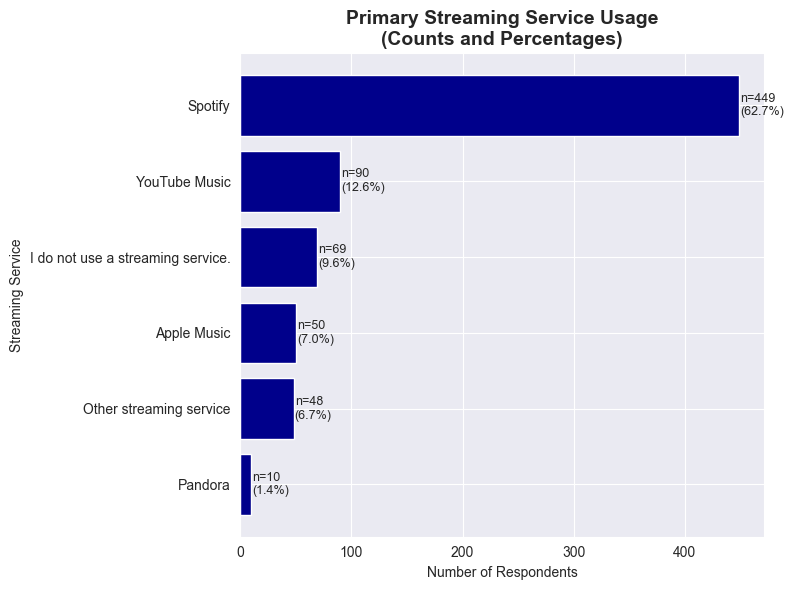

In [246]:
# Compute counts and percentages (same as your code)
service_counts = df['PrimaryStreamingService'].value_counts()
service_pct = (df['PrimaryStreamingService'].value_counts(normalize=True) * 100).round(1)

# Create a summary DataFrame
service_summary = pd.DataFrame({
    'Service': service_counts.index,
    'Count': service_counts.values,
    'Percentage': service_pct.values
}).sort_values('Count', ascending=True)  # Sort for horizontal bar

# Horizontal bar chart (easier for labels)
plt.figure(figsize=(8, 6))
bars = plt.barh(service_summary['Service'], service_summary['Count'], color='darkblue')

# Add count and % labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'n={int(width)}\n({service_summary["Percentage"].iloc[i]}%)', 
             ha='left', va='center', fontsize=9)

plt.title('Primary Streaming Service Usage\n(Counts and Percentages)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Respondents')
plt.ylabel('Streaming Service')
plt.tight_layout()
plt.show()

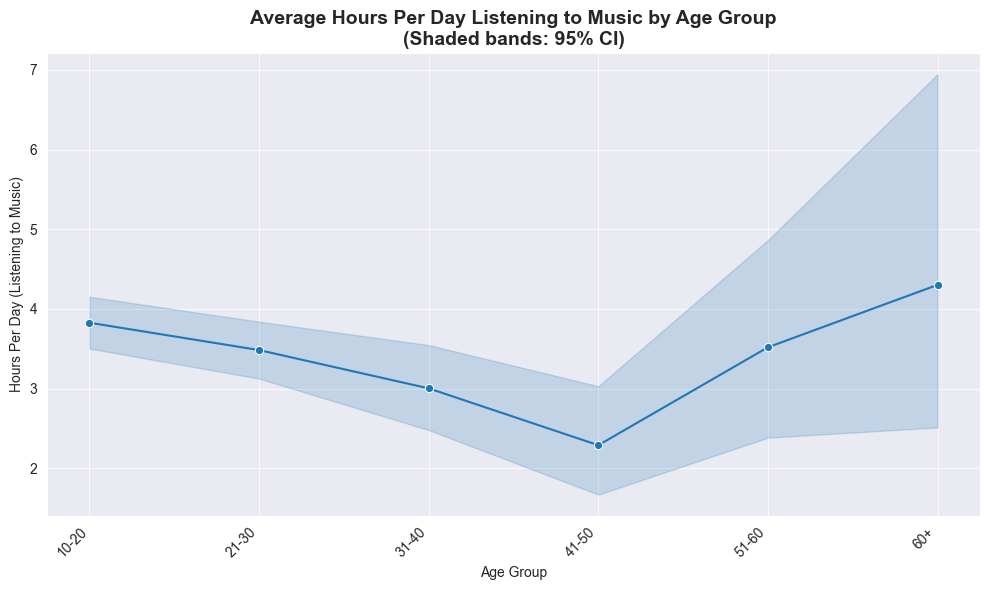

Age_Group
10-20    329
21-30    242
31-40     75
51-60     26
41-50     25
60+       19
Name: count, dtype: int64
Average Hours Per Day by Age Group:
Age_Group
10-20    3.83
21-30    3.48
31-40    3.00
41-50    2.29
51-60    3.52
60+      4.30
Name: HoursPerDay, dtype: float64


In [238]:
# Ensure ordered categories (updated for '60+')
df['Age_Group'] = pd.Categorical(df['Age_Group'], categories=['10-20', '21-30', '31-40', '41-50', '51-60', '60+'], ordered=True)
df_sorted = df.sort_values('Age_Group')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x='Age_Group', y='HoursPerDay', marker='o', errorbar='ci', palette='viridis')
plt.title('Average Hours Per Day Listening to Music by Age Group\n(Shaded bands: 95% CI)', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Hours Per Day (Listening to Music)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.8)
plt.tight_layout()
plt.show()

print(df['Age_Group'].value_counts())
# Print average Hours Per Day by Age Group
averages = df.groupby('Age_Group')['HoursPerDay'].mean().round(2)
print("Average Hours Per Day by Age Group:")
print(averages)

Sample mapped data:
   Classical    Country  Classical_Numeric  Country_Numeric
0      Never      Never                  0                0
1  Sometimes      Never                  2                0
2      Never      Never                  0                0
3     Rarely  Sometimes                  1                2
4  Sometimes      Never                  2                0


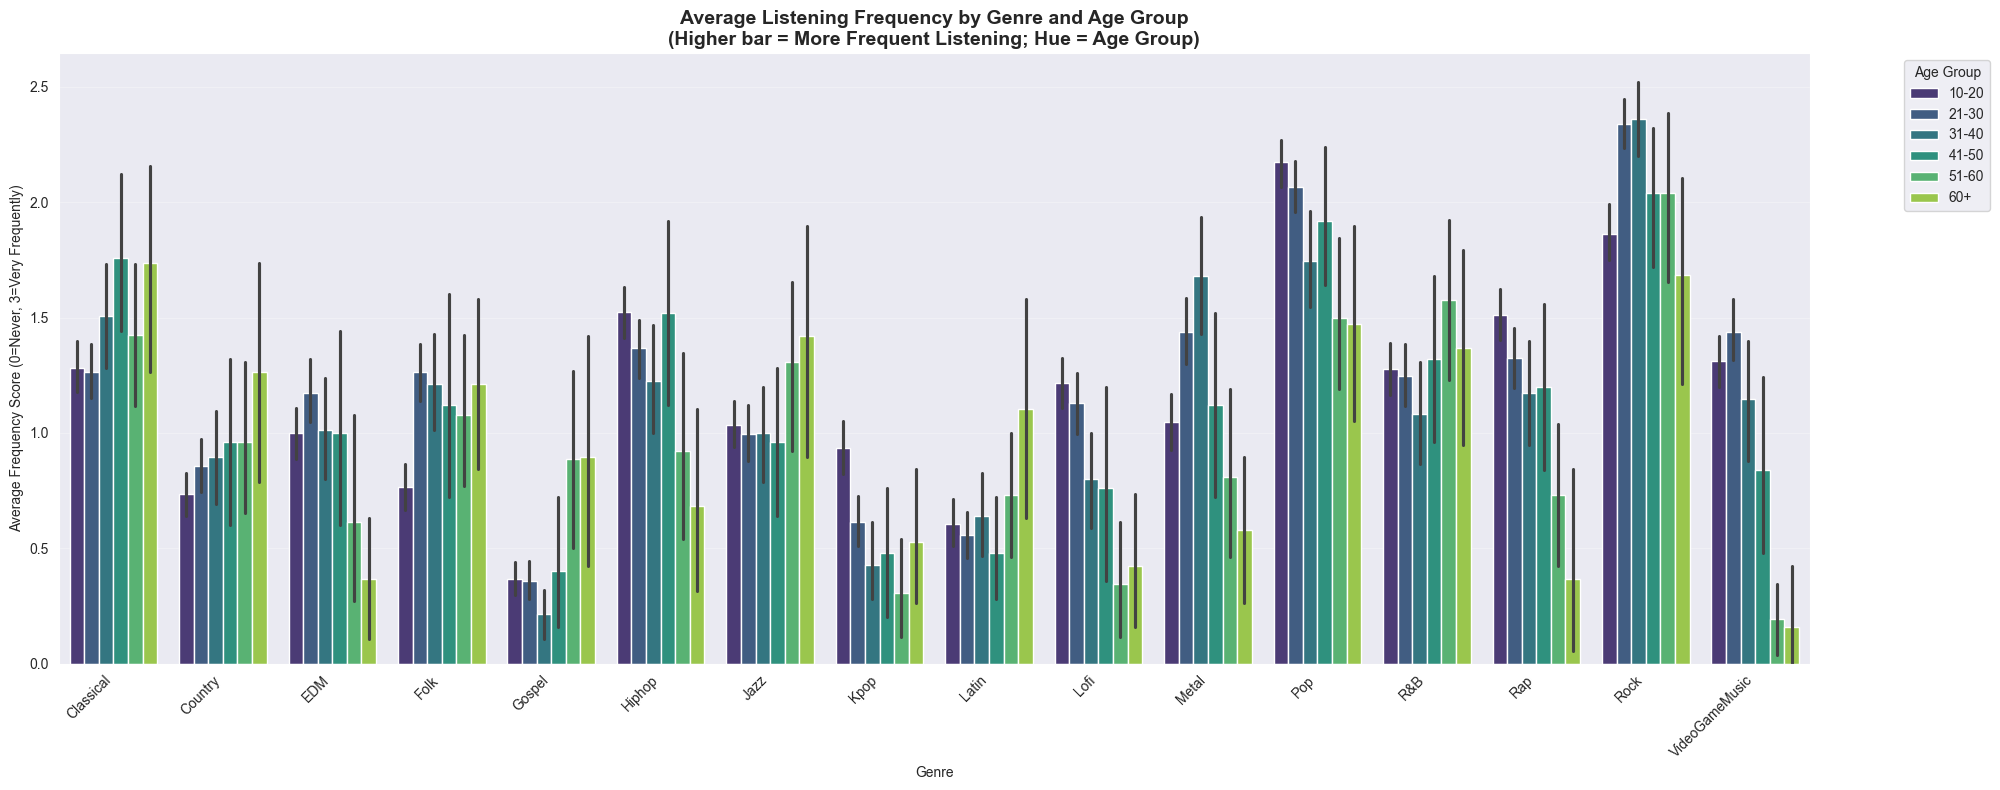

In [240]:
# Genre columns (exact names from your list; adjust if spaces)
genre_cols = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hiphop', 'Jazz', 'Kpop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'VideoGameMusic']

# Frequency mapping (categorical to numeric for averaging)
freq_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}  # Add 'Very High' if present

# Apply to all genres
for col in genre_cols:
    if col in df.columns:
        df[col + '_Numeric'] = df[col].map(freq_map).fillna(0)  # Fill unmapped as 0

print("Sample mapped data:")
print(df[genre_cols[:2] + [col + '_Numeric' for col in genre_cols[:2]]].head())

# Melt data for seaborn (long format: genre, age, avg_freq)
genre_melt = pd.melt(df, id_vars=['Age_Group'], value_vars=[col + '_Numeric' for col in genre_cols],
                     var_name='Genre', value_name='Avg_Frequency')
genre_melt['Genre'] = genre_melt['Genre'].str.replace('_Numeric', '')  # Clean genre names

# Grouped bar plot
plt.figure(figsize=(20, 8))  # Wider for 16 genres
sns.barplot(data=genre_melt, x='Genre', y='Avg_Frequency', hue='Age_Group', palette='viridis')
plt.title('Average Listening Frequency by Genre and Age Group\n(Higher bar = More Frequent Listening; Hue = Age Group)', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Average Frequency Score (0=Never, 3=Very Frequently)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

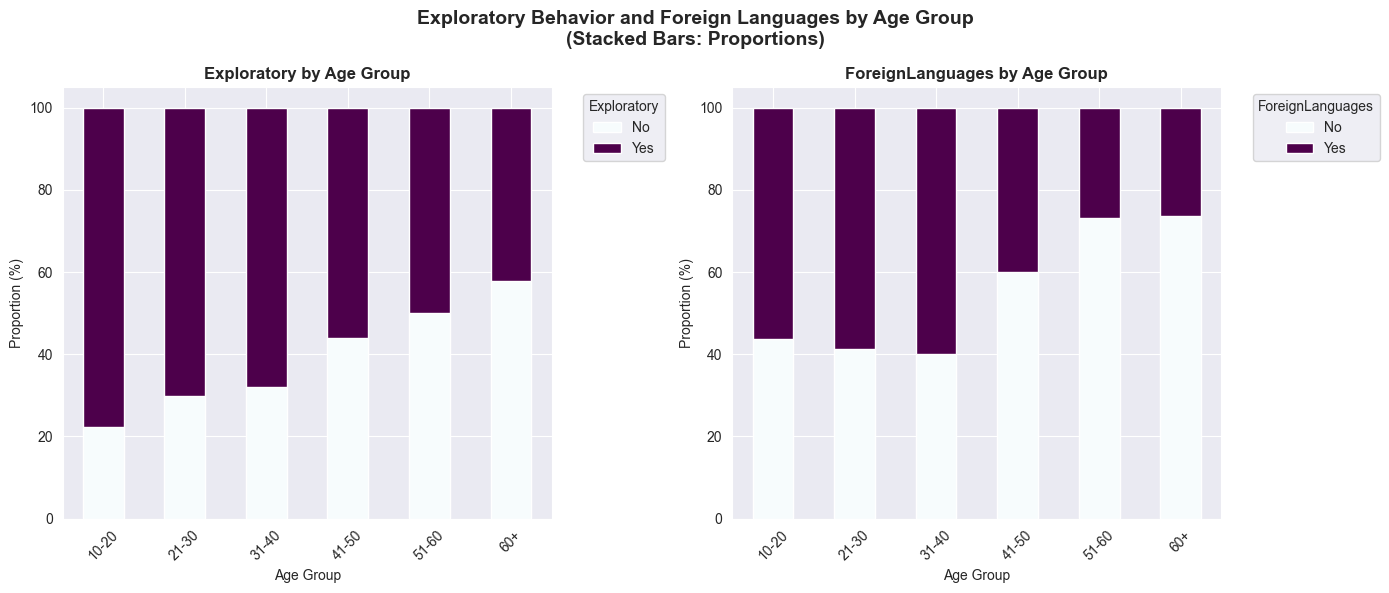


Exploratory by Age Group (%):
Exploratory    No   Yes
Age_Group              
10-20        22.2  77.8
21-30        29.8  70.2
31-40        32.0  68.0
41-50        44.0  56.0
51-60        50.0  50.0
60+          57.9  42.1

ForeignLanguages by Age Group (%):
ForeignLanguages    No   Yes
Age_Group                   
10-20             43.8  56.2
21-30             41.3  58.7
31-40             40.0  60.0
41-50             60.0  40.0
51-60             73.1  26.9
60+               73.7  26.3


In [252]:
# Define variables
vars_to_plot = ['Exploratory', 'ForeignLanguages']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes = axes.ravel()

for i, var in enumerate(vars_to_plot):
    # Crosstab for proportions
    crosstab = pd.crosstab(df['Age_Group'], df[var], normalize='index') * 100
    
    # Plot stacked bar
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], colormap='BuPu')
    axes[i].set_title(f'{var} by Age Group', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Age Group')
    axes[i].set_ylabel('Proportion (%)')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title=var, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.suptitle('Exploratory Behavior and Foreign Languages by Age Group\n(Stacked Bars: Proportions)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print tables for reference
for var in vars_to_plot:
    crosstab = pd.crosstab(df['Age_Group'], df[var], normalize='index') * 100
    print(f"\n{var} by Age Group (%):")
    print(crosstab.round(1))

Correlation Between Mental Health Condition vs Music Type
                  Anxiety  Depression  Insomnia    OCD    BPM  \
Anxiety             1.000       0.523     0.284  0.345  0.037   
Depression          0.523       1.000     0.376  0.186  0.032   
Insomnia            0.284       0.376     1.000  0.224  0.047   
OCD                 0.345       0.186     0.224  1.000 -0.021   
BPM                 0.037       0.032     0.047 -0.021  1.000   
FavGenre_Encoded    0.069       0.047     0.013  0.031  0.067   

                  FavGenre_Encoded  
Anxiety                      0.069  
Depression                   0.047  
Insomnia                     0.013  
OCD                          0.031  
BPM                          0.067  
FavGenre_Encoded             1.000  


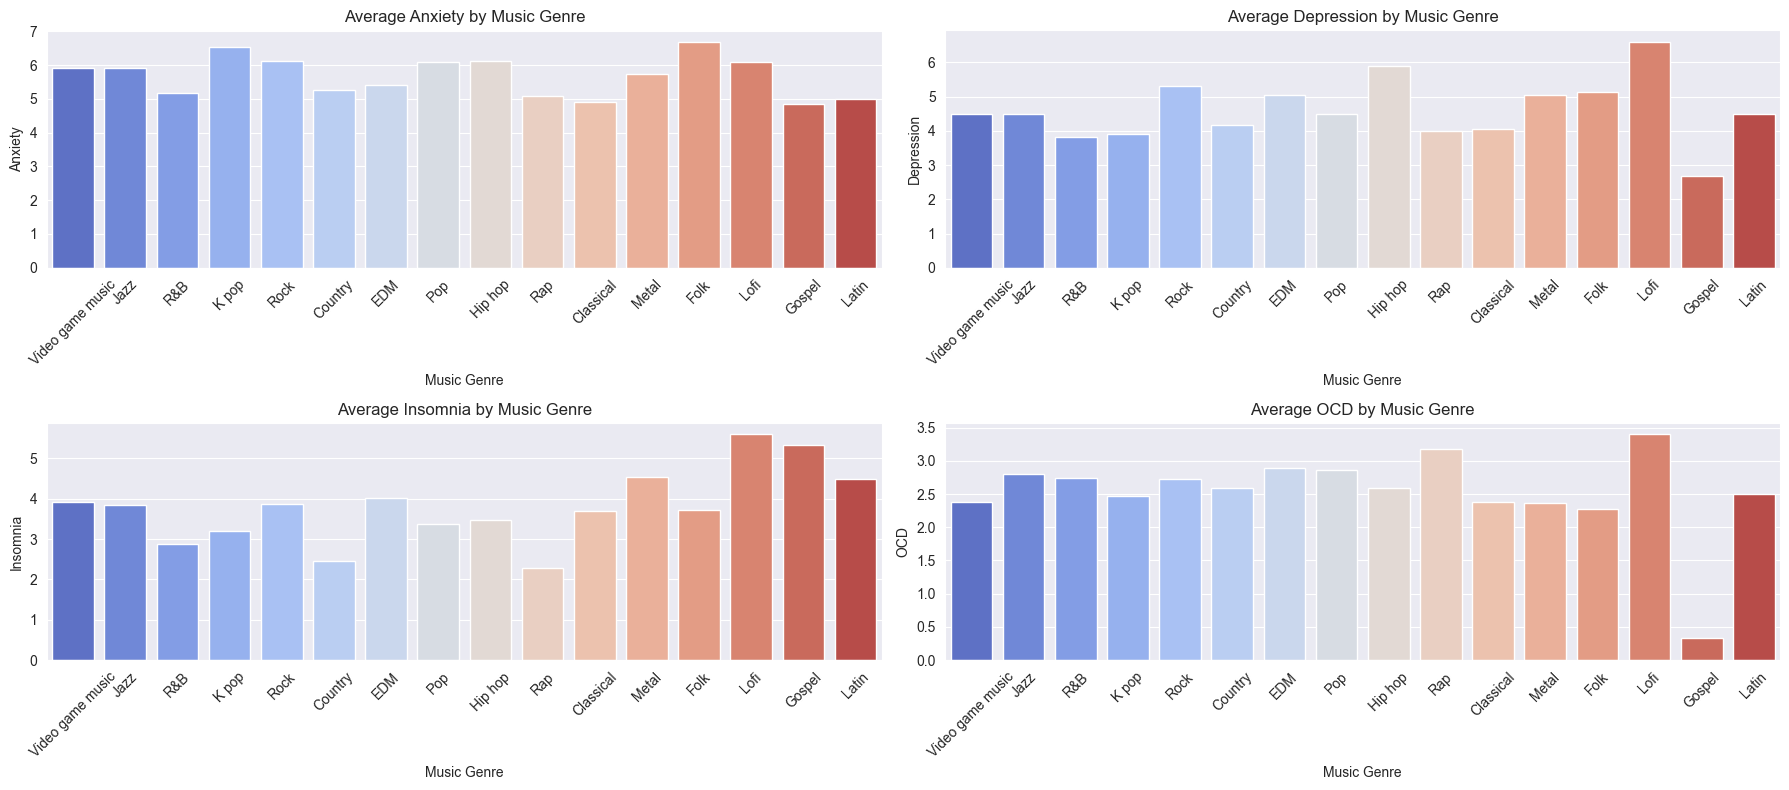

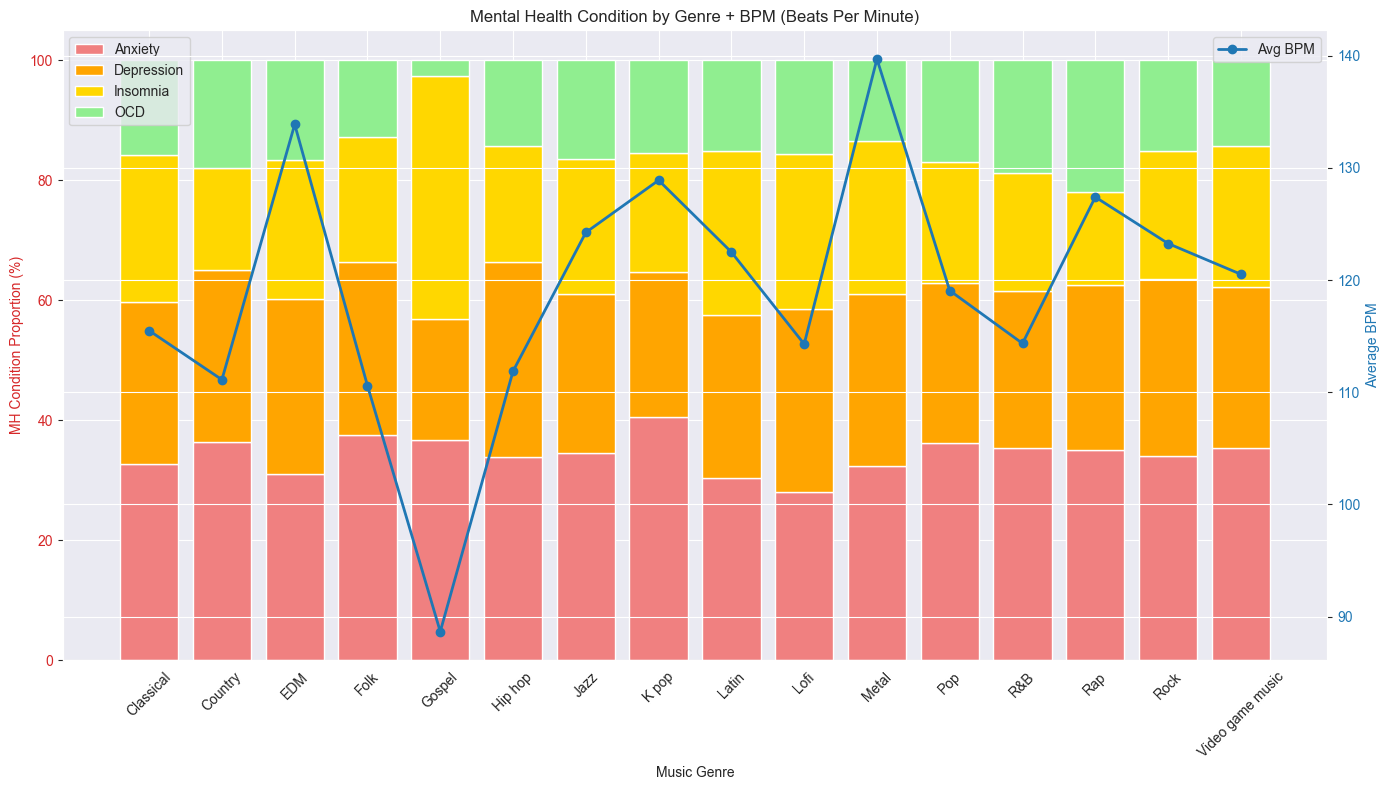

Average BPM by Genre (Table):
                    mean    std  count
FavGenre                              
Metal             139.71  39.50     87
EDM               133.89  28.79     35
K pop             128.90  30.88     21
Rap               127.41  23.20     22
Jazz              124.25  35.95     20
Rock              123.27  28.15    184
Latin             122.50  70.00      2
Video game music  120.52  29.87     42
Pop               119.07  26.02    114
Classical         115.50  29.50     51
R&B               114.36  32.66     35
Lofi              114.30  34.40     10
Hip hop           111.88  33.30     34
Country           111.12  16.30     24
Folk              110.59  34.71     29
Gospel             88.67  56.18      6


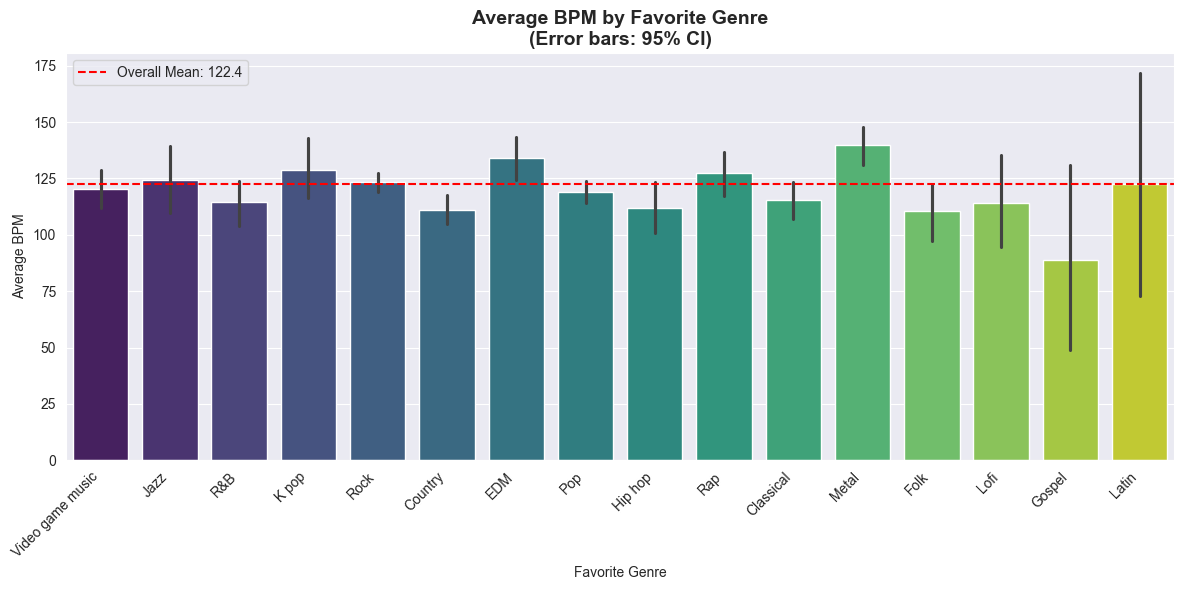

In [257]:
# Encode the categorical genre into numbers
encoder = LabelEncoder()
df['FavGenre_Encoded'] = encoder.fit_transform(df['FavGenre'])

# Corelationship between the BPM (Beats per Minute ) and the Anxiety , Depression , Insomnia , OCD (Obsessive Compulsive Disorder)
health_con = ['Anxiety','Depression','Insomnia', 'OCD' ]
music_type = ['BPM', 'FavGenre_Encoded' ]
correlation_matrix = df[health_con + music_type].corr()
print("Correlation Between Mental Health Condition vs Music Type") 
print (correlation_matrix.round(3))

health_con = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

plt.figure(figsize=(18, 8))

for i, condition in enumerate(health_con, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='FavGenre', y=condition, data=df, ci=None, palette='coolwarm')
    plt.title(f"Average {condition} by Music Genre")
    plt.xticks(rotation=45)
    plt.xlabel("Music Genre")
    plt.ylabel(condition)

plt.tight_layout()
plt.show()

# Prepare data: Average MH per genre, stacked proportions
genre_mh_avg = df.groupby('FavGenre')[health_con].mean()
genre_bpm_avg = df.groupby('FavGenre')['BPM'].mean()

# Stack MH for bars (normalize to proportions for stacking)
genre_mh_stacked = genre_mh_avg.div(genre_mh_avg.sum(axis=1), axis=0) * 100  # % for visual stacking

# Sort genres by encoded order for consistency
sorted_genres = encoder.inverse_transform(sorted(df['FavGenre_Encoded'].unique()))
genre_mh_stacked = genre_mh_stacked.loc[sorted_genres]
genre_bpm_avg = genre_bpm_avg.loc[sorted_genres]

# Create dual-axis figure
fig, ax1 = plt.subplots(figsize=(14, 8))

# Stacked bars on left axis (MH conditions)
x_pos = np.arange(len(sorted_genres))
ax1.bar(x_pos, genre_mh_stacked['Anxiety'], label='Anxiety', color='lightcoral')
ax1.bar(x_pos, genre_mh_stacked['Depression'], bottom=genre_mh_stacked['Anxiety'], label='Depression', color='orange')
ax1.bar(x_pos, genre_mh_stacked['Insomnia'], bottom=genre_mh_stacked['Anxiety'] + genre_mh_stacked['Depression'], label='Insomnia', color='gold')
ax1.bar(x_pos, genre_mh_stacked['OCD'], bottom=genre_mh_stacked['Anxiety'] + genre_mh_stacked['Depression'] + genre_mh_stacked['Insomnia'], label='OCD', color='lightgreen')
ax1.set_xlabel('Music Genre')
ax1.set_ylabel('MH Condition Proportion (%)', color='tab:red')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(sorted_genres, rotation=45)
ax1.legend(loc='upper left')
ax1.tick_params(axis='y', labelcolor='tab:red')

# BPM line on right axis
ax2 = ax1.twinx()
ax2.plot(x_pos, genre_bpm_avg.values, color='tab:blue', marker='o', linewidth=2, label='Avg BPM')
ax2.set_ylabel('Average BPM', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(loc='upper right')

plt.title('Mental Health Condition by Genre + BPM (Beats Per Minute)')
fig.tight_layout()
plt.show()

# Compute average BPM by genre (drop nulls for clean calc)
genre_bpm = df.groupby('FavGenre')['BPM'].agg(['mean', 'std', 'count']).round(2)
genre_bpm['mean'] = genre_bpm['mean'].fillna(0)  # Rare, but handle

print("Average BPM by Genre (Table):")
print(genre_bpm.sort_values('mean', ascending=False))

# Bar plot visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='FavGenre', y='BPM', ci=95, palette='viridis')  # ci=95 for error bars
plt.title('Average BPM by Favorite Genre\n(Error bars: 95% CI)', fontsize=14, fontweight='bold')
plt.xlabel('Favorite Genre')
plt.ylabel('Average BPM')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=df['BPM'].mean(), color='red', linestyle='--', label=f'Overall Mean: {df["BPM"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()

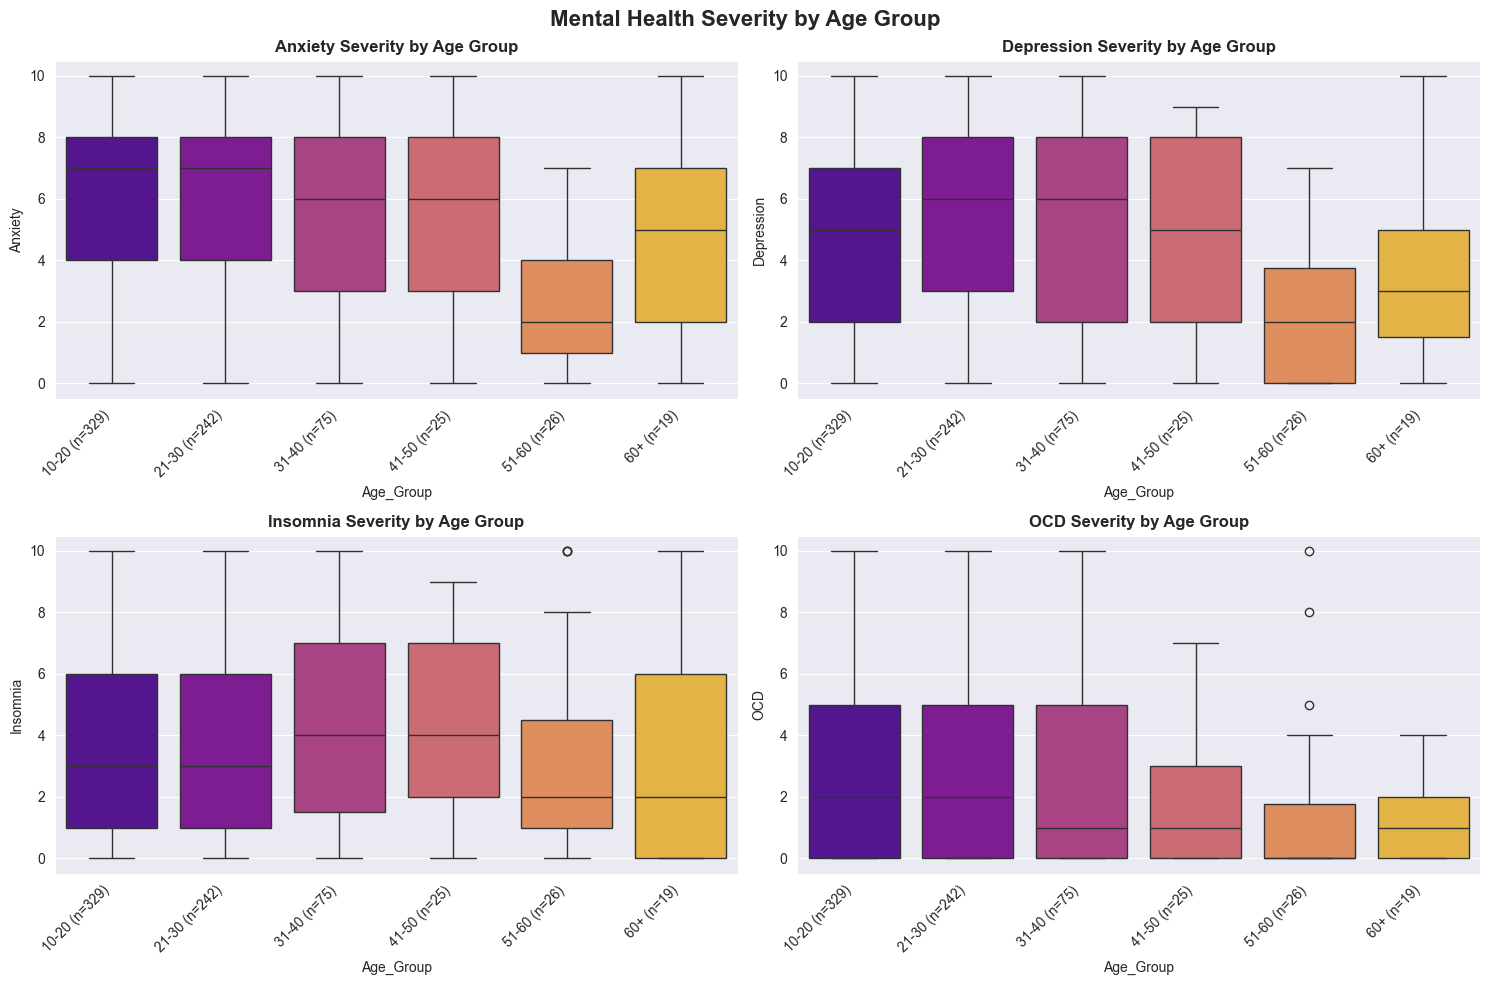

In [258]:
# Define disorders
disorders = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Compute counts per Age_Group for labels
counts = df['Age_Group'].value_counts().sort_index().to_dict()

# Create updated x-labels with counts
updated_labels = [f"{group} (n={counts.get(group, 0)})" for group in df['Age_Group'].cat.categories]

# Subplots for each disorder (using boxplot as alternative to violin)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()  # Flatten for easy indexing

for i, disorder in enumerate(disorders):
    sns.boxplot(data=df, x='Age_Group', y=disorder, palette='plasma', ax=axes[i])
    axes[i].set_title(f'{disorder} Severity by Age Group', fontsize=12, fontweight='bold')
    axes[i].set_xticklabels(updated_labels, rotation=45, ha='right')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Mental Health Severity by Age Group', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

Music Effects Proportions by Age Group (%):
MusicEffects  Improve  No effect  Worsen
Age_Group                               
10-20            80.5       17.0     2.4
21-30            71.1       27.3     1.7
31-40            58.7       34.7     6.7
41-50            76.0       24.0     0.0
51-60            69.2       30.8     0.0
60+              84.2       15.8     0.0


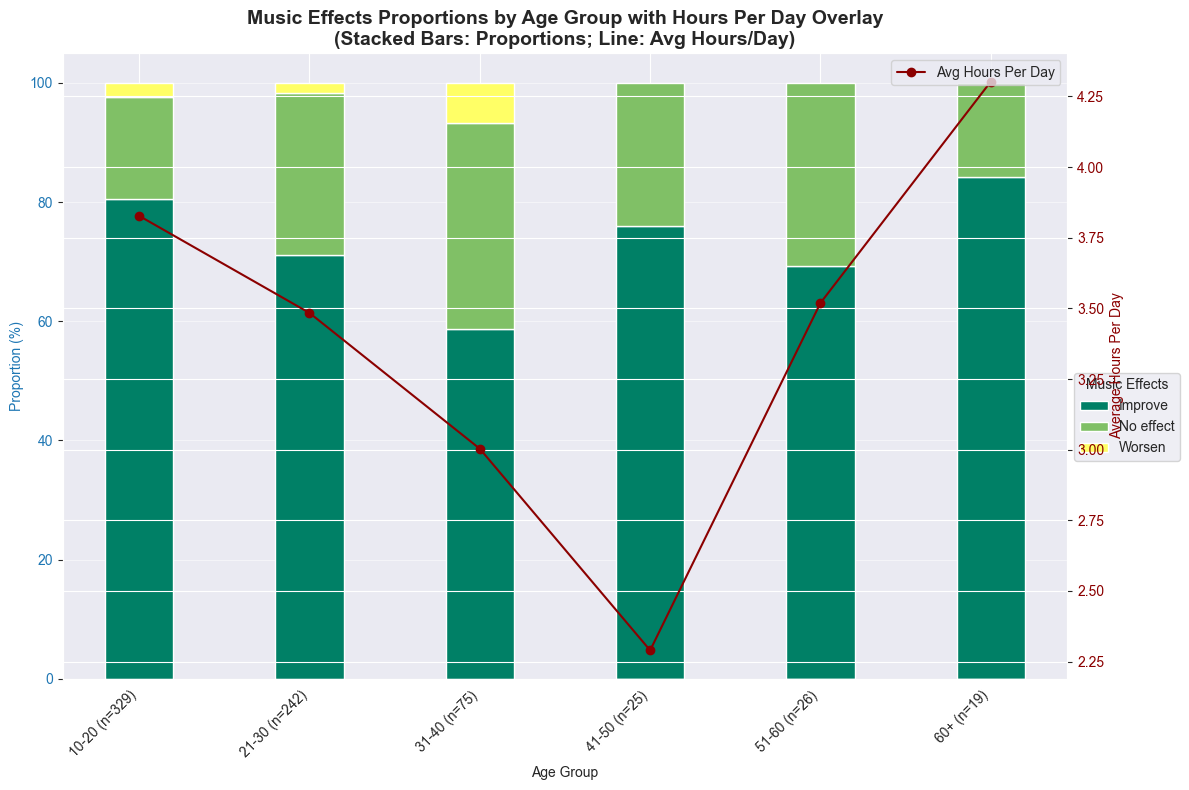

In [239]:
# Compute crosstab (proportions %)
crosstab = pd.crosstab(df['Age_Group'], df['MusicEffects'], normalize='index') * 100

# Print table for verification (shows % per category)
print("Music Effects Proportions by Age Group (%):")
print(crosstab.round(1))

# Get counts for labels
counts = df['Age_Group'].value_counts().sort_index().to_dict()
updated_labels = [f"{group} (n={counts.get(group, 0)})" for group in df['Age_Group'].cat.categories]

# Prepare data for overlay: Average Hours Per Day by Age Group
hours_means = df.groupby('Age_Group')['HoursPerDay'].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Stacked bar (Music Effects proportions)
x_pos = np.arange(len(updated_labels))
crosstab.plot(kind='bar', stacked=True, ax=ax1, colormap='summer', position=0.5, width=0.4)
ax1.set_title('Music Effects Proportions by Age Group with Hours Per Day Overlay\n(Stacked Bars: Proportions; Line: Avg Hours/Day)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Proportion (%)', color='tab:blue')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(updated_labels, rotation=45, ha='right')
ax1.legend(title='Music Effects', bbox_to_anchor=(1.00, 0.5), loc='best')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary axis for Hours Per Day line
ax2 = ax1.twinx()
ax2.plot(x_pos, hours_means.values, color='darkred', marker='o', linewidth=1.5, label='Avg Hours Per Day')
ax2.set_ylabel('Average Hours Per Day', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.legend(loc='upper right')

# Add grid for clarity
ax1.grid(True, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

Favorite Genre Proportions by Age Group (%):
FavGenre   Classical  Country  EDM  Folk  Gospel  Hip hop  Jazz  K pop  Latin  \
Age_Group                                                                       
10-20            7.6      3.3  5.8   2.1     0.3      5.2   2.4    5.8    0.6   
21-30            4.5      3.3  5.4   6.2     0.0      5.0   3.7    0.8    0.0   
31-40            9.3      4.0  2.7   5.3     0.0      5.3   1.3    0.0    0.0   
41-50           12.0      4.0  4.0  12.0     0.0      0.0   0.0    0.0    0.0   
51-60            7.7      0.0  0.0   0.0    11.5      3.8   3.8    0.0    0.0   
60+             15.8      5.3  0.0   0.0    10.5      0.0   5.3    0.0    0.0   

FavGenre   Lofi  Metal   Pop   R&B  Rap  Rock  Video game music  
Age_Group                                                        
10-20       0.9    8.8  19.1   7.0  4.9  20.4               5.8  
21-30       2.5   15.7  14.9   2.9  2.1  25.6               7.4  
31-40       1.3   20.0   6.7   0.0  0.0  3

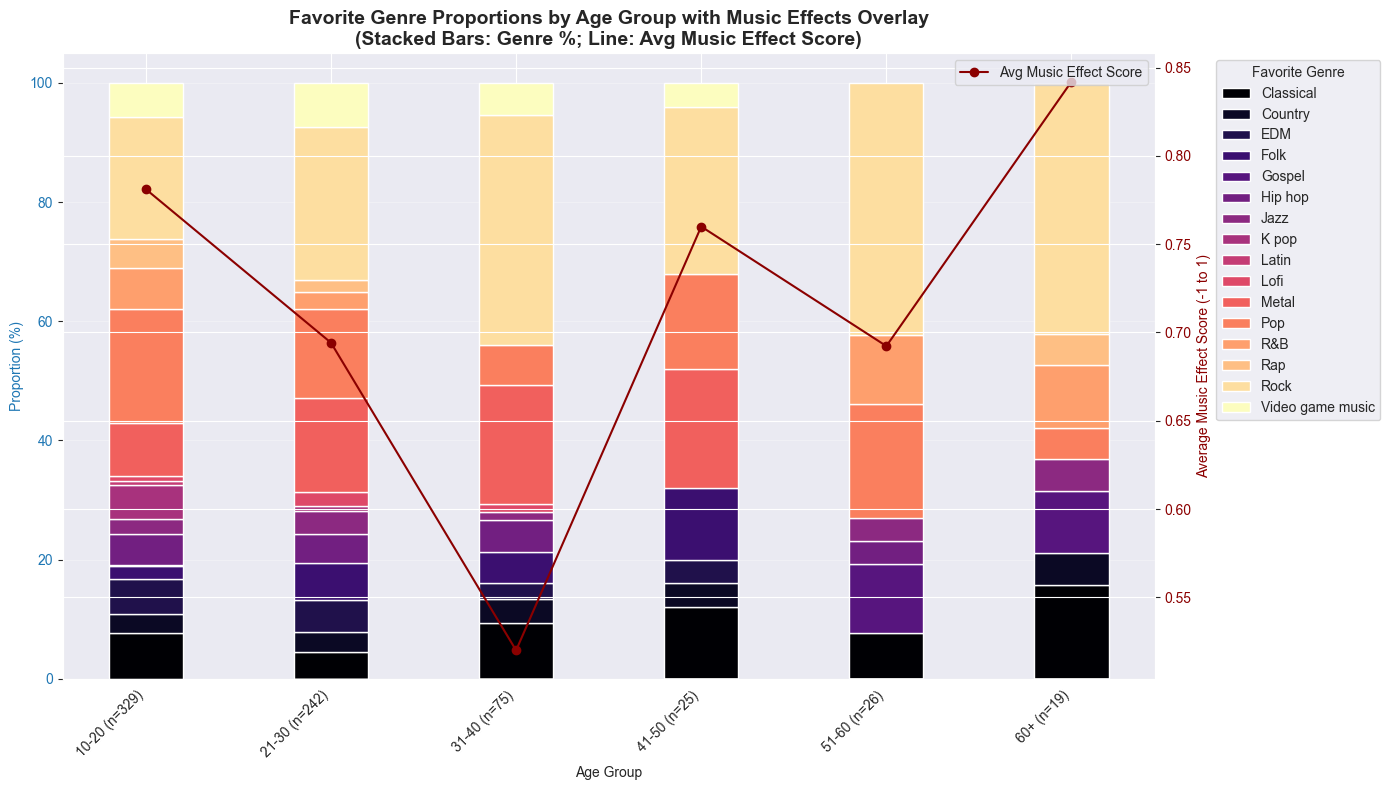


Average Music Effect Score by Age Group:
Age_Group
10-20    0.78
21-30    0.69
31-40    0.52
41-50    0.76
51-60    0.69
60+      0.84
Name: MusicEffects_Numeric, dtype: float64


In [230]:

# Favorite Genre Proportions by Age Group (Stacked Bar)
crosstab_fav = pd.crosstab(df['Age_Group'], df['FavGenre'], normalize='index') * 100

# Print for verification
print("Favorite Genre Proportions by Age Group (%):")
print(crosstab_fav.round(1))

# Get counts for labels
counts = df['Age_Group'].value_counts().sort_index().to_dict()
updated_labels = [f"{group} (n={counts.get(group, 0)})" for group in df['Age_Group'].cat.categories]

# Map MusicEffects to numeric for line (e.g., Improve=1, No effect=0, Worsen=-1; adjust based on your categories)
effect_map = {'Improve': 1, 'No effect': 0, 'Worsen': -1}  # Customize to your values
df['MusicEffects_Numeric'] = df['MusicEffects'].map(effect_map).fillna(0)

# Average MusicEffects by Age Group for line
effect_means = df.groupby('Age_Group')['MusicEffects_Numeric'].mean()

fig, ax1 = plt.subplots(figsize=(14, 8))  # Create fig and ax1 for dual-axis

# Stacked bar for Favorite Genres
crosstab_fav.plot(kind='bar', stacked=True, ax=ax1, colormap='magma', width=0.4)
ax1.set_title('Favorite Genre Proportions by Age Group with Music Effects Overlay\n(Stacked Bars: Genre %; Line: Avg Music Effect Score)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Proportion (%)', color='tab:blue')
ax1.set_xticklabels(updated_labels, rotation=45, ha='right')
ax1.legend(title='Favorite Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, alpha=0.3, axis='y')

# Secondary axis (ax2) for stacked line (Music Effects mean as line)
ax2 = ax1.twinx()
x_pos = np.arange(len(updated_labels))
ax2.plot(x_pos, effect_means.values, color='darkred', marker='o', linewidth=1.5, label='Avg Music Effect Score')
ax2.set_ylabel('Average Music Effect Score (-1 to 1)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(updated_labels, rotation=45, ha='right')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Print Music Effects summary for reference
print("\nAverage Music Effect Score by Age Group:")
print(effect_means.round(2))

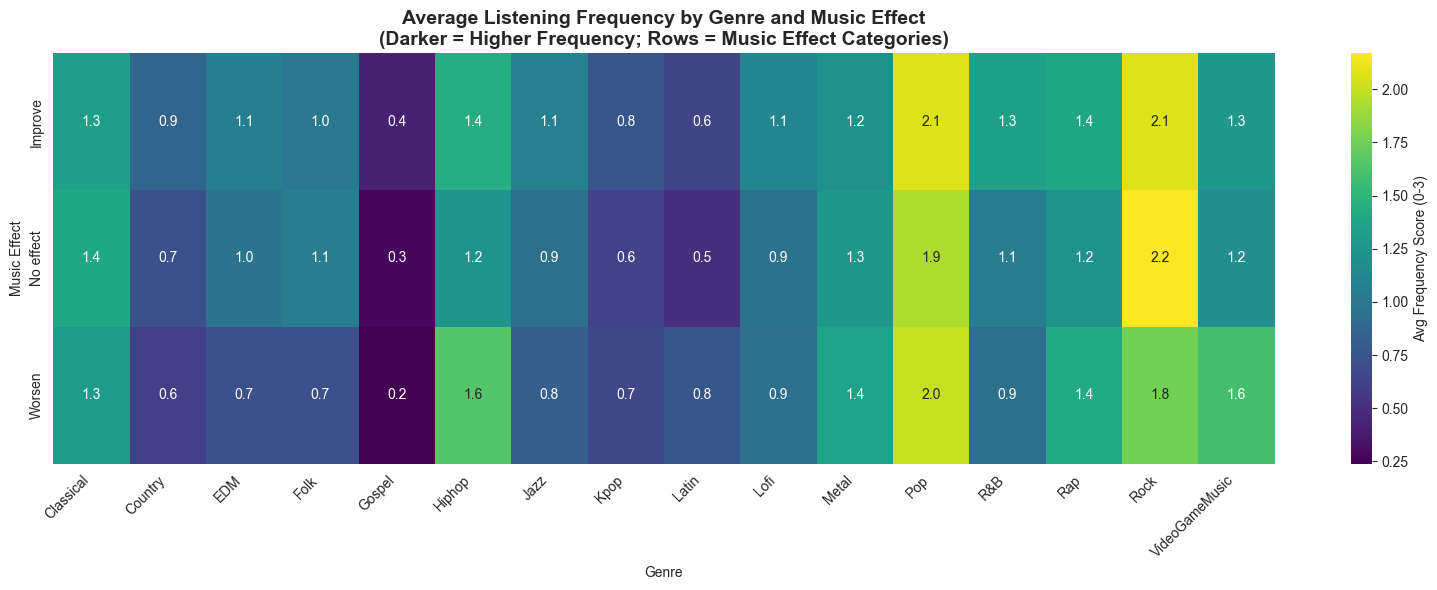

Pivot Table (Avg Frequency by Music Effect and Genre):
Genre         Classical  Country   EDM  Folk  Gospel  Hiphop  Jazz  Kpop  \
MusicEffects                                                               
Improve            1.32     0.86  1.06  1.01    0.42    1.44  1.07  0.76   
No effect          1.39     0.72  0.98  1.05    0.28    1.24  0.94  0.62   
Worsen             1.29     0.59  0.71  0.71    0.24    1.65  0.82  0.65   

Genre         Latin  Lofi  Metal   Pop   R&B   Rap  Rock  VideoGameMusic  
MusicEffects                                                              
Improve        0.63  1.12   1.21  2.07  1.34  1.38  2.07            1.26  
No effect      0.50  0.95   1.26  1.93  1.05  1.22  2.17            1.19  
Worsen         0.76  0.94   1.35  2.00  0.94  1.41  1.76            1.59  


In [259]:
# Genre columns
genre_cols = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hiphop', 'Jazz', 'Kpop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'VideoGameMusic']

# Frequency mapping (categorical to numeric for averaging)
freq_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}  # Adjust if more categories

# Apply mapping to genres
for col in genre_cols:
    if col in df.columns:
        df[col + '_Numeric'] = df[col].map(freq_map).fillna(0)

# Melt for heatmap (long format)
df_melt = pd.melt(df, id_vars=['MusicEffects'], value_vars=[col + '_Numeric' for col in genre_cols],
                  var_name='Genre', value_name='Frequency_Score')
df_melt['Genre'] = df_melt['Genre'].str.replace('_Numeric', '')

# Pivot for heatmap (rows=MusicEffects, cols=Genre, values=mean frequency)
pivot_table = df_melt.pivot_table(values='Frequency_Score', index='MusicEffects', columns='Genre', aggfunc='mean').round(2)

# Heatmap visualization
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='viridis', cbar_kws={'label': 'Avg Frequency Score (0-3)'})
plt.title('Average Listening Frequency by Genre and Music Effect\n(Darker = Higher Frequency; Rows = Music Effect Categories)', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Music Effect')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print table 
print("Pivot Table (Avg Frequency by Music Effect and Genre):")
print(pivot_table)

Exploratory by Age Group (%):
Exploratory    No   Yes
Age_Group              
10-20        22.2  77.8
21-30        29.8  70.2
31-40        32.0  68.0
41-50        44.0  56.0
51-60        50.0  50.0
60+          57.9  42.1

Foreign Languages by Age Group (%):
ForeignLanguages    No   Yes
Age_Group                   
10-20             43.8  56.2
21-30             41.3  58.7
31-40             40.0  60.0
41-50             60.0  40.0
51-60             73.1  26.9
60+               73.7  26.3


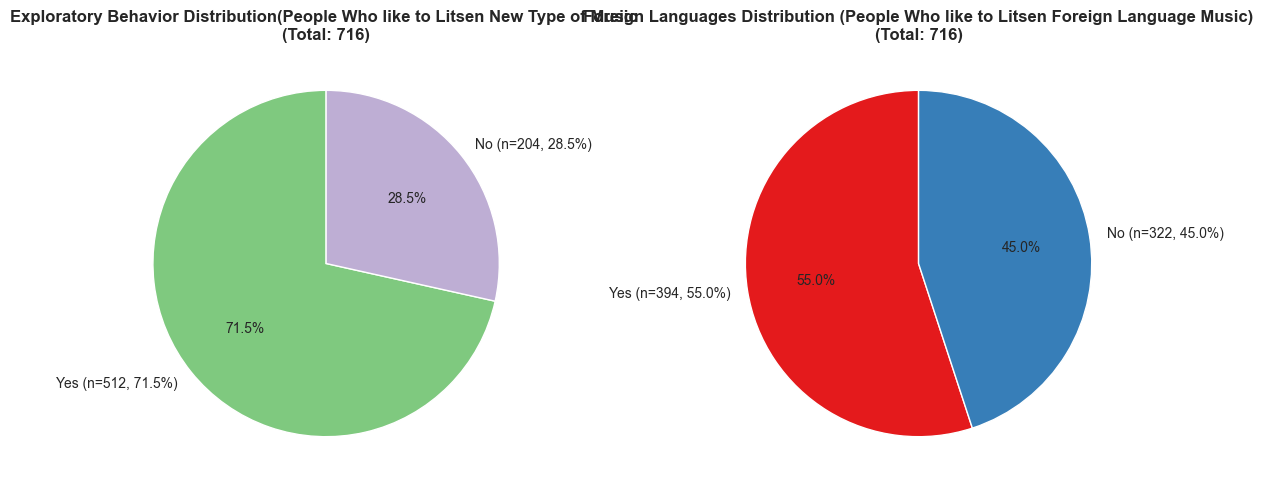

In [261]:
exploratory_counts = df['Exploratory'].value_counts()
total = len(df)
exploratory_pct = (exploratory_counts / total * 100).round(1)

labels_exp = [f"{cat} (n={cnt}, {pct}%)" for cat, cnt, pct in zip(exploratory_counts.index, exploratory_counts.values, exploratory_pct.values)]

# Age-specific table
exp_by_age = pd.crosstab(df['Age_Group'], df['Exploratory'], normalize='index') * 100
print("Exploratory by Age Group (%):")
print(exp_by_age.round(1))

#  Data Prep for Foreign Languages
foreign_counts = df['ForeignLanguages'].value_counts()  # Or 'ForeignLanguages' if not renamed
foreign_pct = (foreign_counts / total * 100).round(1)

labels_foreign = [f"{cat} (n={cnt}, {pct}%)" for cat, cnt, pct in zip(foreign_counts.index, foreign_counts.values, foreign_pct.values)]

# Age-specific table
foreign_by_age = pd.crosstab(df['Age_Group'], df['ForeignLanguages'], normalize='index') * 100
print("\nForeign Languages by Age Group (%):")
print(foreign_by_age.round(1))

# Subplot Pie Charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left: Exploratory Pie
colors = plt.cm.Accent(range(len(exploratory_counts)))
colors1 = plt.cm.Set1(range(len(exploratory_counts)))
ax1.pie(exploratory_counts.values, labels=labels_exp, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.set_title('Exploratory Behavior Distribution(People Who like to Litsen New Type of Music \n(Total: {})'.format(total), fontsize=12, fontweight='bold')

# Right: Foreign Languages Pie
ax2.pie(foreign_counts.values, labels=labels_foreign, autopct='%1.1f%%', startangle=90, colors=colors1)
ax2.set_title('Foreign Languages Distribution (People Who like to Litsen Foreign Language Music)\n(Total: {})'.format(total), fontsize=12, fontweight='bold')


plt.tight_layout()
plt.show()